<a href="https://colab.research.google.com/github/bsap16/superstore/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Superstore

##Bibliotecas e base de dados

In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import sqlite3
from sqlalchemy import create_engine
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('superstore.csv')
total_dados = df.shape[0]
print(f"Total de dados: {total_dados}")
print(df.dtypes)

Total de dados: 51290
category           object
city               object
country            object
customer_ID        object
customer_name      object
discount          float64
market             object
unknown             int64
order_date         object
order_id           object
order_priority     object
product_id         object
product_name       object
profit            float64
quantity            int64
region             object
row_id              int64
sales               int64
segment            object
ship_date          object
ship_mode          object
shipping_cost     float64
state              object
sub_category       object
year                int64
market2            object
weeknum             int64
dtype: object


##Nulos

In [ ]:
total_nulos = df.isnull().sum()
total_nulos

,0
category,0
city,0
country,0
customer_ID,0
customer_name,0
discount,0
market,0
unknown,0
order_date,0
order_id,0


##Dados duplicados

In [ ]:
total_duplicados = df.duplicated().sum()
total_duplicados

0

##Dados discrepantes

In [ ]:
# Listando os valores únicos e a quantidade de repetições
valores_unicos = {col: df[col].value_counts() for col in df.columns if col in ['category','city','country','customer_ID','customer_name','discount','market','unknown','order_date','order_id','order_priority','product_id','product_name','profit','quantity','region','row_id','sales','segment','ship_date','ship_mode','shipping_cost','state','sub_category','year','market2','weeknum']}

# Apresentando os valores
for col, unique_vals in valores_unicos.items():
    print(f"Unique values for column '{col}':")
    print(unique_vals)
    print("-" * 20) # Separador das variáveis

Unique values for column 'category':
category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64
--------------------
Unique values for column 'city':
city
New York City            915
Los Angeles              747
Philadelphia             537
San Francisco            510
Santo Domingo            443
                        ... 
Hadera                     1
Morley                     1
Villeneuve-la-Garenne      1
Torremolinos               1
Redwood City               1
Name: count, Length: 3636, dtype: int64
--------------------
Unique values for column 'country':
country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
South Sudan         2
Chad                2
Swaziland           2
Eritrea             2
Bahrain             2
Name: count, Length: 147, dtype: int64
--------------------
Unique values for column 'customer_ID':
customer_ID
JG-158051    40


##Web scrapping

In [ ]:
# Página que será realizado o Web Scrapping
url = "https://en.wikipedia.org/wiki/List_of_supermarket_chains"

# Requesitando o link
response = requests.get(url)

# Verificando se a requisição foi bem sucedida
if response.status_code == 200:
    print("Página baixada com sucesso!")
else:
    print(f"Erro ao baixar a página. Código: {response.status_code}")

Página baixada com sucesso!


In [ ]:
# Processando o conteúdo da página
soup = BeautifulSoup(response.content, 'html.parser')

# Encontrando todas as tabelas da página
tabelas = soup.find_all('table', class_='wikitable')
print(f"Total de tabelas encontradas: {len(tabelas)}")

Total de tabelas encontradas: 1


In [ ]:
# Fazendo uma lista para armazenar os dados extraídos
supermercados = []

# Iterando as tabelas
for tabela in tabelas:
    linhas = tabela.find_all('tr') # Encontrando todas as linhas. TR = Table Row
    for linha in linhas[1:]:  # Ignorando o cabeçalho
        colunas = linha.find_all('td') # Encontrando as colunas. TD = Table Data
        if len(colunas) >= 3: # Verificando se existem ao menos 3 colunas
            company = colunas[0].get_text(strip=True)
            headquarters = colunas[1].get_text(strip=True)
            number_of_locations = colunas[4].get_text(strip=True)

            # Armazenando os dados na lista
            supermercados.append({
                'company': company,
                'headquarters': headquarters,
                'number_of_locations': number_of_locations
            })

print(supermercados[:10])

[{'company': '7-Eleven', 'headquarters': 'JapanUnited States', 'number_of_locations': '84,500'}, {'company': 'Aeon', 'headquarters': 'Japan', 'number_of_locations': '20,008'}, {'company': 'Ahold Delhaize', 'headquarters': 'Netherlands', 'number_of_locations': '7,659'}, {'company': 'Aldi Nord', 'headquarters': 'Germany', 'number_of_locations': '5,435'}, {'company': 'Aldi Süd', 'headquarters': 'Germany', 'number_of_locations': '7,397'}, {'company': 'Aldi', 'headquarters': 'Germany(Süd and Nord)', 'number_of_locations': "12,832 (13,419 if includingTrader Joe's)"}, {'company': 'Edeka', 'headquarters': 'Germany', 'number_of_locations': '13,646'}, {'company': 'Extra', 'headquarters': 'Germany', 'number_of_locations': ''}, {'company': 'Tengelmann Group', 'headquarters': 'Germany', 'number_of_locations': '4,170'}, {'company': 'Minimal', 'headquarters': 'Germany', 'number_of_locations': '1,500'}]


###Salvando os dados em um arquivo

In [ ]:
# Criando um DataFrame e salvando em CSV
df_supermercados = pd.DataFrame(supermercados)
for col in df_supermercados.columns:
    df_supermercados[col] = df_supermercados[col].str.replace(r'(?<=[a-z])(?=[A-Z])', ' ', regex=True)
df_supermercados.to_csv('supermercados.csv', index=False, encoding='utf-8')
print(df_supermercados.head())
print("Dados salvos no arquivo supermercados.csv!")

          company         headquarters number_of_locations
0        7-Eleven  Japan United States              84,500
1            Aeon                Japan              20,008
2  Ahold Delhaize          Netherlands               7,659
3       Aldi Nord              Germany               5,435
4        Aldi Süd              Germany               7,397
Dados salvos no arquivo supermercados.csv!


##Tabelas de fatos e dimensões

###Tabela de dimensão

Dimensão do produto

In [ ]:
# Criando a tabela de dimensão dos produtos
dim_produto = df[['product_id', 'product_name', 'category', 'sub_category']].drop_duplicates()
dim_produto.columns = ['id_produto', 'nome_produto', 'categoria', 'sub_categoria']
print(dim_produto.head())

        id_produto                                       nome_produto  \
0  OFF-PA-10002005                                          Xerox 225   
1  OFF-PA-10002893          Wirebound Service Call Books, 5 1/2" x 4"   
2  OFF-PA-10000659  Adams Phone Message Book, Professional, 400 Me...   
3  OFF-PA-10001144                                         Xerox 1913   
4  OFF-PA-10002105                                          Xerox 223   

         categoria sub_categoria  
0  Office Supplies         Paper  
1  Office Supplies         Paper  
2  Office Supplies         Paper  
3  Office Supplies         Paper  
4  Office Supplies         Paper  


Dimensão do cliente

In [ ]:
# Criando tabela de dimensão dos clientes
dim_cliente = df[['customer_ID', 'customer_name', 'segment']].drop_duplicates()
dim_cliente.columns = ['id_cliente', 'nome_cliente', 'segmento']
print(dim_cliente.head())

  id_cliente      nome_cliente  segmento
0  LS-172304  Lycoris Saunders  Consumer
1  MV-174854     Mark Van Huff  Consumer
2  CS-121304      Chad Sievert  Consumer
4  AP-109154    Arthur Prichep  Consumer
5  JF-154904      Jeremy Farry  Consumer


Dimensão das regiões

In [ ]:
# Criando tabela de dimensão das regiões
dim_regiao = df[['state', 'city', 'region','order_id']].drop_duplicates()
dim_regiao.columns = ['estado', 'cidade', 'regiao', 'id_ordem']
print(dim_regiao.head())

       estado       cidade regiao        id_ordem
0  California  Los Angeles   West  CA-2011-130813
1  California  Los Angeles   West  CA-2011-148614
2  California  Los Angeles   West  CA-2011-118962
4  California  Los Angeles   West  CA-2011-146969
5  California  Los Angeles   West  CA-2011-117317


###Tabela de fato

In [ ]:
# Criando tabela de fatos
fato_vendas = df[['order_id','product_id', 'customer_ID', 'order_date', 'sales', 'quantity', 'discount', 'profit']]
fato_vendas.columns = ['id_ordem', 'id_produto', 'id_cliente', 'data_ordem', 'vendas', 'quantidade', 'desconto', 'lucro']
print(fato_vendas.head())

         id_ordem       id_produto id_cliente          data_ordem  vendas  \
0  CA-2011-130813  OFF-PA-10002005  LS-172304  2011-01-07 0:00:00      19   
1  CA-2011-148614  OFF-PA-10002893  MV-174854  2011-01-21 0:00:00      19   
2  CA-2011-118962  OFF-PA-10000659  CS-121304  2011-08-05 0:00:00      21   
3  CA-2011-118962  OFF-PA-10001144  CS-121304  2011-08-05 0:00:00     111   
4  CA-2011-146969  OFF-PA-10002105  AP-109154  2011-09-29 0:00:00       6   

   quantidade  desconto    lucro  
0           3       0.0   9.3312  
1           2       0.0   9.2928  
2           3       0.0   9.8418  
3           2       0.0  53.2608  
4           1       0.0   3.1104  


##Relacionando as tabelas de fato e dimensão

In [ ]:
# Mesclando a tabela de fatos com a de dimensão de produto
fato_vendas_completo = fato_vendas.merge(dim_produto, on='id_produto', how='left')

# Mesclando a tabela de fatos com a de dimensão de clientes
fato_vendas_completo = fato_vendas_completo.merge(dim_cliente, on='id_cliente', how='left')

# Mesclando a tabela de fatos com a de dimensão de região
fato_vendas_completo = fato_vendas_completo.merge(dim_regiao, on='id_ordem', how='left')

print(fato_vendas_completo.head())

         id_ordem       id_produto id_cliente          data_ordem  vendas  \
0  CA-2011-130813  OFF-PA-10002005  LS-172304  2011-01-07 0:00:00      19   
1  CA-2011-148614  OFF-PA-10002893  MV-174854  2011-01-21 0:00:00      19   
2  CA-2011-118962  OFF-PA-10000659  CS-121304  2011-08-05 0:00:00      21   
3  CA-2011-118962  OFF-PA-10000659  CS-121304  2011-08-05 0:00:00      21   
4  CA-2011-118962  OFF-PA-10001144  CS-121304  2011-08-05 0:00:00     111   

   quantidade  desconto    lucro  \
0           3       0.0   9.3312   
1           2       0.0   9.2928   
2           3       0.0   9.8418   
3           3       0.0   9.8418   
4           2       0.0  53.2608   

                                        nome_produto        categoria  \
0                                          Xerox 225  Office Supplies   
1          Wirebound Service Call Books, 5 1/2" x 4"  Office Supplies   
2  Adams Phone Message Book, Professional, 400 Me...  Office Supplies   
3  TOPS Carbonless Receipt B

###Salvando tabelas

In [ ]:
# Conectando ao banco de dados do SQLite
engine = create_engine('sqlite:///superstore.db')

# Salvando as tabelas de dimensão e fatos
dim_produto.to_sql('dim_produto', con=engine, if_exists='replace', index=False)
dim_cliente.to_sql('dim_cliente', con=engine, if_exists='replace', index=False)
dim_regiao.to_sql('dim_regiao', con=engine, if_exists='replace', index=False)
fato_vendas.to_sql('fato_vendas', con=engine, if_exists='replace', index=False)

print("Tabelas salvas com sucesso no banco de dados!")

Tabelas salvas com sucesso no banco de dados!


##Relacionando os dados de web scrapping com a base de dados

In [ ]:
# Selecionando as colunas relevantes para a dimensão
df_dim = df[['state', 'city', 'country', 'order_id']].drop_duplicates()
df_dim.columns = ['estado', 'cidade', 'pais', 'id_ordem']

# Limpando e padronizando os dados
df_dim['pais'] = df_dim['pais'].str.strip()
df_supermercados['headquarters'] = df_supermercados['headquarters'].str.strip()

# Unindo os dados das duas bases usando a chave "pais" e "headquarters"
dim_regiao_juntas = df_dim.merge(
    df_supermercados[['company', 'headquarters', 'number_of_locations']],
    left_on='pais',
    right_on='headquarters',
    how='left'
)

# Renomeando colunas para manter clareza
dim_regiao_juntas = dim_regiao_juntas.rename(columns={'company': 'empresa', 'number_of_locations': 'quantidade_de_locais','headquarters': 'cidade_matriz'})

print(dim_regiao_juntas.head())

       estado       cidade           pais        id_ordem     empresa  \
0  California  Los Angeles  United States  CA-2011-130813      Costco   
1  California  Los Angeles  United States  CA-2011-130813  Dominick's   
2  California  Los Angeles  United States  CA-2011-130813       H-E-B   
3  California  Los Angeles  United States  CA-2011-130813  Super Valu   
4  California  Los Angeles  United States  CA-2011-130813     Walmart   

   cidade_matriz quantidade_de_locais  
0  United States                  861  
1  United States                  116  
2  United States                 420+  
3  United States               2,150+  
4  United States               10,586  


##Análise exploratória

###Visualização dos dados categóricos

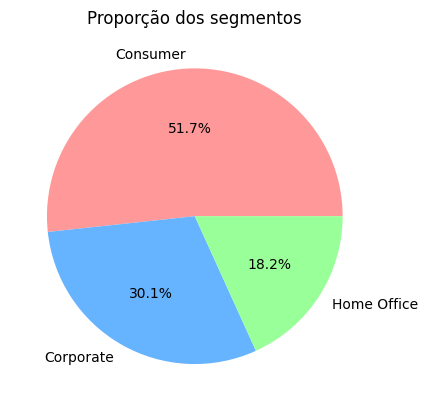

In [ ]:
df['segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Proporção dos segmentos')
plt.ylabel('')
plt.show()

<ipython-input-78-5dfcf3694f53>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='Oranges')


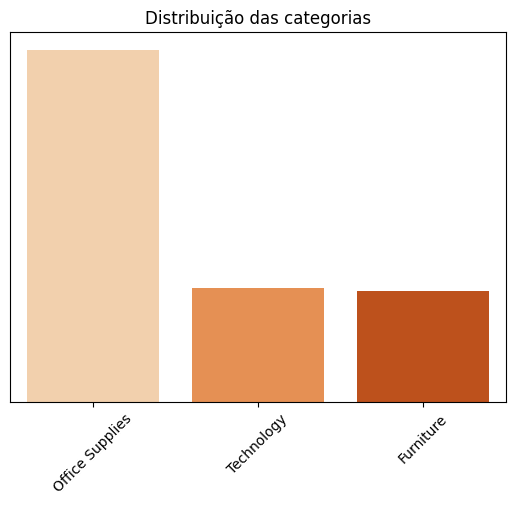

In [ ]:
sns.countplot(data=df, x='category', palette='Oranges')
plt.title('Distribuição das categorias')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.xticks(rotation=45)
plt.show()

<ipython-input-79-61c3ca546882>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sub_category', palette='Blues')


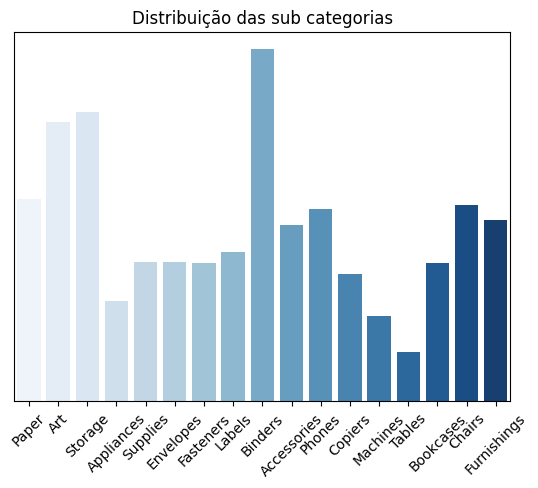

In [ ]:
sns.countplot(data=df, x='sub_category', palette='Blues')
plt.title('Distribuição das sub categorias')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.xticks(rotation=45)
plt.show()

<ipython-input-80-35a9ec083d39>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ship_mode', palette='Greens')


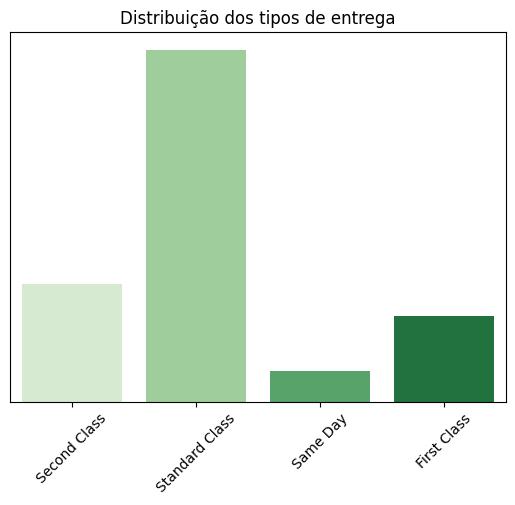

In [ ]:
sns.countplot(data=df, x='ship_mode', palette='Greens')
plt.title('Distribuição dos tipos de entrega')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.xticks(rotation=45)
plt.show()

<ipython-input-74-a3dad1be0073>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='region', palette='Reds')


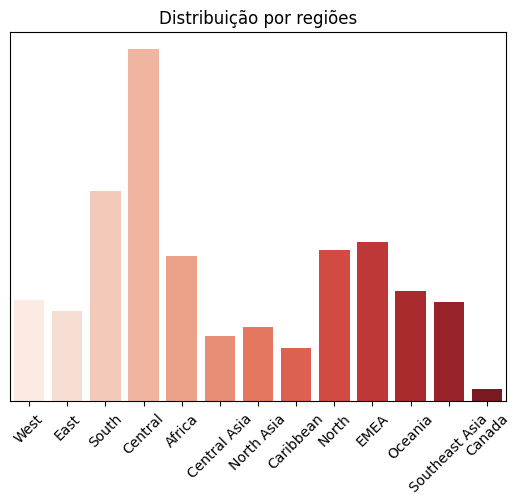

In [ ]:
sns.countplot(data=df, x='region', palette='Reds')
plt.title('Distribuição por regiões')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.xticks(rotation=45)
plt.show()

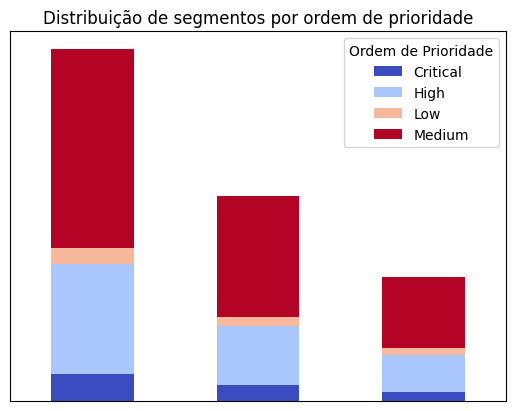

In [ ]:
pd.crosstab(df['segment'], df['order_priority']).plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Distribuição de segmentos por ordem de prioridade')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.xticks([])
plt.xticks(rotation=45)
plt.legend(title='Ordem de Prioridade', loc='upper right')
plt.show()


<ipython-input-90-a25fcb950d4d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='sales', data=df, palette='Set3')


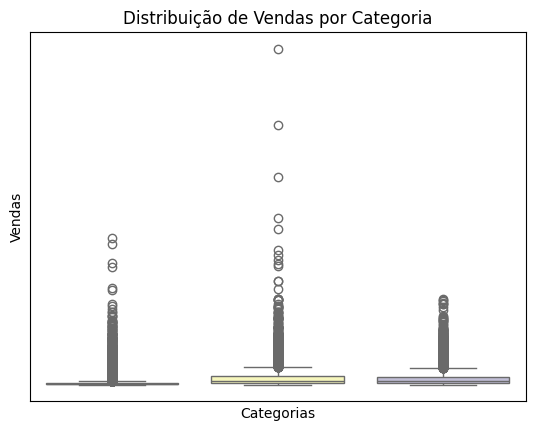

In [ ]:
sns.boxplot(x='category', y='sales', data=df, palette='Set3')
plt.title('Distribuição de Vendas por Categoria')
plt.ylabel('Vendas')
plt.xlabel('Categorias')
plt.yticks([])
plt.xticks([])
plt.xticks(rotation=45)
plt.show()

###Medidas de tendência central

In [ ]:
media = df['sales'].mean()
mediana = df['sales'].median()
moda = df['sales'].mode()[0]

print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')

Média: 246.49844024176252
Mediana: 85.0
Moda: 13


###Medidas de dispersão

In [ ]:
desvio_padrao = df['sales'].std()
variancia = df['sales'].var()
amplitude = df['sales'].max() - df['sales'].min()
iqr = df['sales'].quantile(0.75) - df['sales'].quantile(0.25)
cv = desvio_padrao / df['sales'].mean()

print(f"Desvio Padrão: {desvio_padrao}")
print(f"Variância: {variancia}")
print(f"Amplitude: {amplitude}")
print(f"IQR: {iqr}")
print(f"Coeficiente de Variação: {cv}")

Desvio Padrão: 487.5671746315864
Variância: 237721.74977822785
Amplitude: 22638
IQR: 220.0
Coeficiente de Variação: 1.9779726563518485


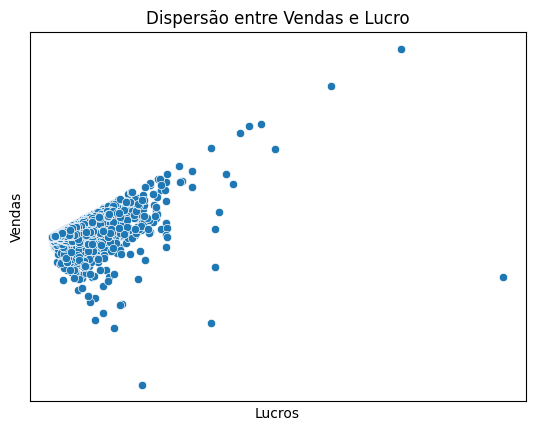

In [ ]:
sns.scatterplot(x=df['sales'], y=df['profit'])
plt.ylabel('Vendas')
plt.xlabel('Lucros')
plt.yticks([])
plt.xticks([])
plt.title('Dispersão entre Vendas e Lucro')
plt.show()

###Comportamento dos dados ao longo do tempo

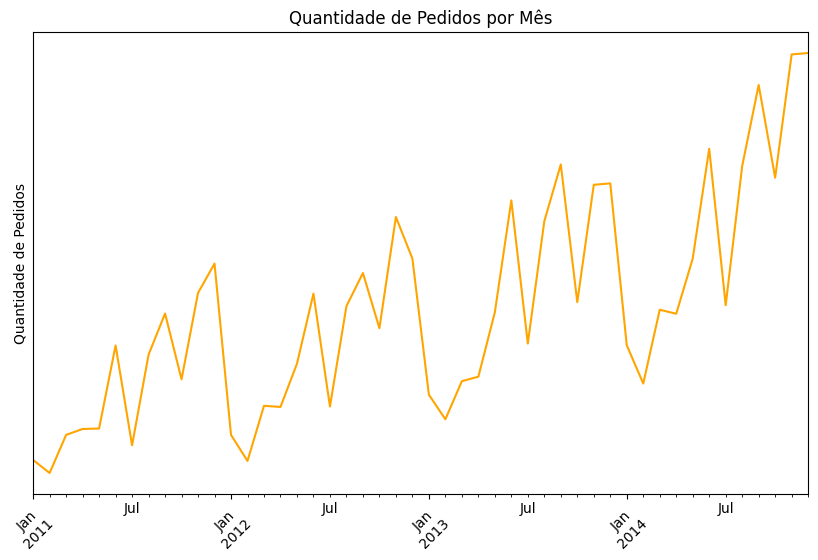

In [ ]:
df.groupby(df['order_date'].dt.to_period('M'))['order_id'].count().plot(kind='line', figsize=(10,6), color='orange')
plt.title('Quantidade de Pedidos por Mês')
plt.xlabel('')
plt.ylabel('Quantidade de Pedidos')
plt.yticks([])
plt.xticks(rotation=45)
plt.show()